In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, SimpleRNN, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

In [49]:
data = pd.read_csv('nhadathadong.csv')
columns_to_drop = [
    'bedroomCount', 'priceExt', 'priceBil', 'area', 
    'balconyDirection', 'priceVnd', 'road', 'floorCount'
]

# Xóa các cột không cần thiết
data = data.drop(columns=columns_to_drop)
display(data)


,areaM2,bedroom,direction,frontage,lat,legal,long,price,priceMil,pricePerM2,toiletCount
0,92.0,3 PN,NaN,NaN,20.979528,Hợp đồng mua bán,105.787567,"3,4 tỷ",3400,36.956522,2 phòng
1,100.0,NaN,NaN,5 m,20.979240,NaN,105.741783,20 tỷ,20000,200.000000,NaN
2,80.0,NaN,Tây - Bắc,4 m,20.979240,Sổ đỏ,105.741783,"16,3 tỷ",16300,203.750000,NaN
3,60.0,NaN,Tây - Bắc,5 m,20.968100,Sổ đỏ/ Sổ hồng,105.754989,"137,5 triệu/m²",-1,-0.016667,NaN
4,NaN,NaN,NaN,NaN,20.984566,NaN,105.785019,35 tỷ,35000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
66,NaN,NaN,Đông - Nam,NaN,20.973156,SĐCC,105.757645,20 tỷ,20000,NaN,NaN
67,NaN,2 PN,NaN,NaN,20.974472,Sổ đỏ/ Sổ hồng,105.760880,"3,9 tỷ",3900,NaN,2 phòng
68,144.0,NaN,Tây - Bắc,6 m,20.979240,Sổ đỏ/ Sổ hồng,105.741783,23 tỷ,23000,159.722222,NaN
69,75.0,5 PN,NaN,NaN,20.959990,Sổ đỏ/ Sổ hồng,105.735924,10 tỷ,10000,133.333333,5 phòng


In [53]:
data['areaM2'] = data['areaM2'].fillna(data['areaM2'].mean())
data['priceMil'] = data['priceMil'].fillna(data['priceMil']. ())
data['pricePerM2'] = data['pricePerM2'].fillna(data['pricePerM2'].mean())
display(data)

,areaM2,bedroom,direction,frontage,lat,legal,long,price,priceMil,pricePerM2,toiletCount
0,92.000000,3 PN,NaN,NaN,20.979528,Hợp đồng mua bán,105.787567,"3,4 tỷ",3400,36.956522,2 phòng
1,100.000000,NaN,NaN,5 m,20.979240,NaN,105.741783,20 tỷ,20000,200.000000,NaN
2,80.000000,NaN,Tây - Bắc,4 m,20.979240,Sổ đỏ,105.741783,"16,3 tỷ",16300,203.750000,NaN
3,60.000000,NaN,Tây - Bắc,5 m,20.968100,Sổ đỏ/ Sổ hồng,105.754989,"137,5 triệu/m²",-1,-0.016667,NaN
4,100.065574,NaN,NaN,NaN,20.984566,NaN,105.785019,35 tỷ,35000,134.998558,NaN
...,...,...,...,...,...,...,...,...,...,...,...
66,100.065574,NaN,Đông - Nam,NaN,20.973156,SĐCC,105.757645,20 tỷ,20000,134.998558,NaN
67,100.065574,2 PN,NaN,NaN,20.974472,Sổ đỏ/ Sổ hồng,105.760880,"3,9 tỷ",3900,134.998558,2 phòng
68,144.000000,NaN,Tây - Bắc,6 m,20.979240,Sổ đỏ/ Sổ hồng,105.741783,23 tỷ,23000,159.722222,NaN
69,75.000000,5 PN,NaN,NaN,20.959990,Sổ đỏ/ Sổ hồng,105.735924,10 tỷ,10000,133.333333,5 phòng


In [9]:


# Xử lý frontage: Bỏ "m", thay dấu phẩy bằng dấu chấm và chuyển sang float
data['frontage'] = data['frontage'].str.replace(' m', '').str.replace(',', '.').astype(float)
data['frontage'].fillna(data['frontage'].mean(), inplace=True)  

# Điền giá trị mặc định cho các cột phân loại
data['bedroom'].fillna('1 PN', inplace=True)  
data['toiletCount'].fillna('1 phòng', inplace=True) 
data['direction'].fillna('Không xác định', inplace=True)  
data['legal'].fillna('Không rõ', inplace=True)  

# Dùng regex để lấy ra các số
data['bedroom'] = data['bedroom'].str.extract(r'(\d+)').astype(float)
data['toiletCount'] = data['toiletCount'].str.extract(r'(\d+)').astype(float)

# Định nghĩa các từ điển ánh xạ cho từng cột
direction_map = {
    'Không xác định': 0,
    'Tây - Bắc': 1,
    'Đông - Bắc': 2,
    'Đông - Nam': 3,
    'Tây - Nam': 4,
    'Đông': 5,
    'Tây': 6,
    'Nam': 7,
    'Bắc': 8
}

legal_map = {
    'Không rõ': 0,
    'Sổ đỏ': 1,
    'Sổ đỏ/ Sổ hồng': 2,
    'Sổ đỏ lâu dài': 3,
    'Đang chờ sổ': 4,
    'Hợp đồng mua bán': 5,
    'SĐCC': 6
}

# Áp dụng ánh xạ cho các cột trong DataFrame
data['direction'] = data['direction'].map(direction_map).fillna(-1).astype(int)
data['legal'] = data['legal'].map(legal_map).fillna(-1).astype(int)

# Xử lý dữ liệu giá lỗi
mask = data['price'].str.contains('triệu/m²', na=False)
data.loc[mask, 'pricePerM2'] = data.loc[mask, 'price'].str.replace(' triệu/m²', '').replace(',', '', regex=True).astype(float)
data.loc[mask, 'priceMil'] = (data.loc[mask, 'areaM2'] * data.loc[mask, 'pricePerM2']) 

data['priceMil'] = data['priceMil'].fillna(0).astype(int)
data['priceMil'] = (data['priceMil'] / 1000).round(2)

data.drop(columns=['price', 'pricePerM2'], inplace=True)

display(data)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7752\1618342281.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['frontage'].fillna(data['frontage'].mean(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7752\1618342281.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

,areaM2,bedroom,direction,frontage,lat,legal,long,priceMil,toiletCount
0,92.000000,3.0,0,6.3405,20.979528,5,105.787567,3.40,2.0
1,100.000000,1.0,0,5.0000,20.979240,0,105.741783,20.00,1.0
2,80.000000,1.0,1,4.0000,20.979240,1,105.741783,16.30,1.0
3,60.000000,1.0,1,5.0000,20.968100,2,105.754989,82.50,1.0
4,100.065574,1.0,0,6.3405,20.984566,0,105.785019,35.00,1.0
...,...,...,...,...,...,...,...,...,...
66,100.065574,1.0,3,6.3405,20.973156,6,105.757645,20.00,1.0
67,100.065574,2.0,0,6.3405,20.974472,2,105.760880,3.90,2.0
68,144.000000,1.0,1,6.0000,20.979240,2,105.741783,23.00,1.0
69,75.000000,5.0,0,6.3405,20.959990,2,105.735924,10.00,5.0


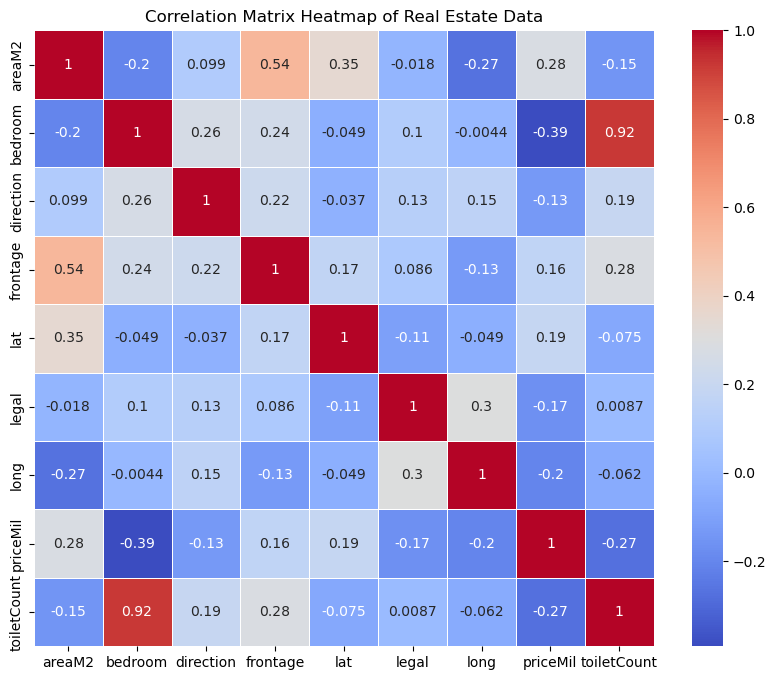

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap of Real Estate Data")
plt.show()

In [39]:
from sklearn.preprocessing import MinMaxScaler
features = data.drop(columns=['priceMil'])
label = data['priceMil']

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

data = pd.DataFrame(features_scaled, columns=features.columns)
data['priceMil'] = label  
display(data)


,areaM2,bedroom,direction,frontage,lat,legal,long,toiletCount,priceMil
0,0.240157,0.4,0.000,0.208781,0.883643,0.857143,0.885029,0.2,3.40
1,0.271654,0.0,0.000,0.125000,0.878849,0.142857,0.100414,0.0,20.00
2,0.192913,0.0,0.125,0.062500,0.878849,0.285714,0.100414,0.0,16.30
3,0.114173,0.0,0.125,0.125000,0.693415,0.428571,0.326720,0.0,82.50
4,0.271912,0.0,0.000,0.208781,0.967485,0.142857,0.841368,0.0,35.00
...,...,...,...,...,...,...,...,...,...
66,0.271912,0.0,0.375,0.208781,0.777574,1.000000,0.372238,0.0,20.00
67,0.271912,0.2,0.000,0.208781,0.799479,0.428571,0.427675,0.2,3.90
68,0.444882,0.0,0.125,0.187500,0.878849,0.428571,0.100414,0.0,23.00
69,0.173228,0.8,0.000,0.208781,0.558420,0.428571,0.000000,0.8,10.00


In [15]:
X = data[['areaM2', 'bedroom', 'direction','frontage', 'lat', 'legal', 'long','toiletCount']]
y = data['priceMil']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [17]:
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, reshape_input=None):
    if reshape_input=='cnn':
        X_train = np.expand_dims(X_train, axis=-1) 
        X_val = np.expand_dims(X_val, axis=-1)  
        X_test = np.expand_dims(X_test, axis=-1)
    elif reshape_input=='rnn':
        X_train = np.expand_dims(X_train, axis=1) 
        X_val = np.expand_dims(X_val, axis=1)  
        X_test = np.expand_dims(X_test, axis=1)
    
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])
    history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val), verbose=1)
    predicted = model.predict(X_test)
    y_test_pred = predicted.flatten()
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)

    return mae, mse, rmse, history, predicted

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

mlp_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(100, activation='relu'),     
    Dropout(0.5),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='relu'),
    Dropout(0.3),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='linear')      
])
mlp_mae, mlp_mse, mlp_rmse, mlp_history, predicted_mlp = evaluate_model(mlp_model, X_train, y_train, X_val, y_val, X_test, y_test, 'MLP')

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - loss: 475.0958 - mae: 14.8185 - val_loss: 327.1069 - val_mae: 14.8235
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 431.9638 - mae: 13.8077 - val_loss: 324.1251 - val_mae: 14.7188
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 374.4055 - mae: 13.5544 - val_loss: 319.4619 - val_mae: 14.5563
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 429.1230 - mae: 13.9846 - val_loss: 312.4192 - val_mae: 14.3085
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 449.9008 - mae: 14.4384 - val_loss: 302.3003 - val_mae: 13.9455
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 415.6362 - mae: 13.5644 - val_loss: 287.8840 - val_mae: 13.4098
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 425.1783 - mae: 13.8220 - val_loss: 267.6218 - val_mae: 12.6185
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 366.8582 - mae: 12.2850 - val_loss: 240.2963 - val_mae: 11.6538
Epoch 9/200
2/2 ━━━━━━━

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input,BatchNormalization

cnn_model = Sequential([
    Input(shape=(X_train.shape[1], 1)),                # Đầu vào Conv1D
    Conv1D(100, 2, activation='relu', padding='same'),
    BatchNormalization(),   # Layer 1
    MaxPooling1D(pool_size=2),                         # Layer 2
    Conv1D(100, 2, activation='relu', padding='same'),
    BatchNormalization(),   # Layer 3
    MaxPooling1D(pool_size=2),                         # Layer 4
    Conv1D(100, 2, activation='relu', padding='same'),
    BatchNormalization(),   # Layer 5
    Flatten(),                                         # Layer 6
    Dense(100, activation='relu'),                     # Layer 7
    Dropout(0.5),
    Dense(1, activation='linear')                      # Output layer
])

# Huấn luyện và đánh giá mô hình
cnn_mae, cnn_mse, cnn_rmse, cnn_history, predicted_cnn = evaluate_model(cnn_model, X_train, y_train, X_val, y_val, X_test, y_test, 'cnn')


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 249ms/step - loss: 437.2122 - mae: 13.9653 - val_loss: 328.7808 - val_mae: 14.8821
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 312.5618 - mae: 12.0424 - val_loss: 327.1071 - val_mae: 14.8268
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 321.9852 - mae: 11.9394 - val_loss: 325.2853 - val_mae: 14.7668
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 310.7475 - mae: 11.9550 - val_loss: 323.3012 - val_mae: 14.7009
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 217.1893 - mae: 9.8777 - val_loss: 321.0983 - val_mae: 14.6274
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 276.6273 - mae: 10.5048 - val_loss: 318.6326 - val_mae: 14.5447
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 191.1536 - mae: 9.3470 - val_loss: 316.1064 - val_mae: 14.4587
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 158.1414 - mae: 8.9658 - val_loss: 313.6886 - val_mae: 14.3750
Epoch 9/200
2/2 ━━━━━━━━━━

In [21]:
from tensorflow.keras.layers import SimpleRNN

rnn_model = Sequential([
    Input(shape=(1, X_train.shape[1])),
    SimpleRNN(100, activation='tanh'),  
    Dense(100, activation='relu'),       
    Dropout(0.5),                       
    Dense(100, activation='relu'),       
    Dropout(0.5),                      
    Dense(100, activation='relu'),      
    Dense(1, activation='linear')       
])
rnn_mae, rnn_mse, rnn_rmse, rnn_history, predicted_rnn = evaluate_model(rnn_model, X_train, y_train, X_val, y_val, X_test, y_test, 'rnn')

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - loss: 448.5680 - mae: 14.4183 - val_loss: 322.8108 - val_mae: 14.6832
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 415.4310 - mae: 14.6479 - val_loss: 317.5027 - val_mae: 14.5040
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 391.4956 - mae: 13.9252 - val_loss: 310.8592 - val_mae: 14.2741
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 388.1001 - mae: 14.0168 - val_loss: 302.4661 - val_mae: 13.9787
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 409.2707 - mae: 13.7626 - val_loss: 291.5770 - val_mae: 13.5870
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 438.6584 - mae: 13.9459 - val_loss: 277.5429 - val_mae: 13.0669
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 388.0638 - mae: 13.0068 - val_loss: 260.0696 - val_mae: 12.4126
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 408.0249 - mae: 13.5236 - val_loss: 238.9964 - val_mae: 11.7229
Epoch 9/200
2/2 ━━━━━━━

In [22]:
from tensorflow.keras.layers import LSTM

lstm_model = Sequential([
    Input(shape=( X_train.shape[1],1)),
    LSTM(100, activation='tanh'),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='relu'),
    Dense(1, activation='linear')
])
lstm_mae, lstm_mse, lstm_rmse, lstm_history, predicted_lstm = evaluate_model(lstm_model, X_train, y_train, X_val, y_val, X_test, y_test, 'LSTM')

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 261ms/step - loss: 463.0658 - mae: 14.5178 - val_loss: 328.9264 - val_mae: 14.8871
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 473.1701 - mae: 15.0919 - val_loss: 328.0323 - val_mae: 14.8564
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 458.8896 - mae: 14.4233 - val_loss: 326.8461 - val_mae: 14.8160
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 391.6102 - mae: 13.8414 - val_loss: 325.1801 - val_mae: 14.7592
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 469.6476 - mae: 14.7169 - val_loss: 322.9130 - val_mae: 14.6817
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 454.5178 - mae: 14.6254 - val_loss: 319.7705 - val_mae: 14.5738
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 468.6555 - mae: 14.8215 - val_loss: 315.3217 - val_mae: 14.4198
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 452.0092 - mae: 14.1375 - val_loss: 308.7617 - val_mae: 14.1905
Epoch 9/200
2/2 ━━━━━━━

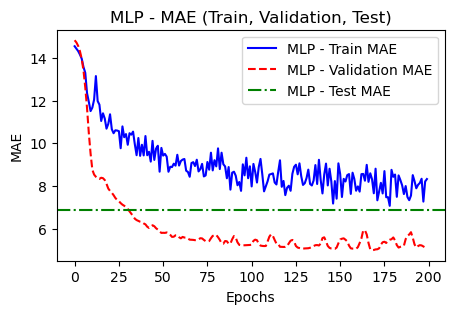

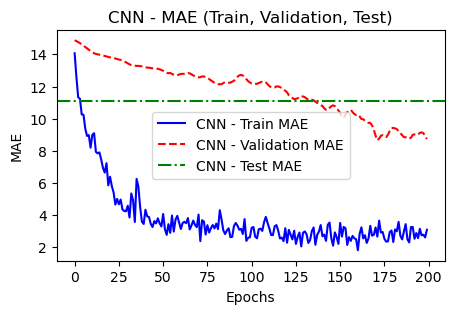

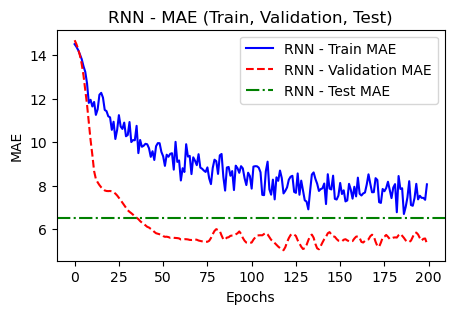

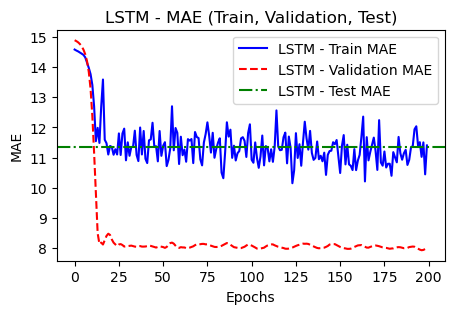

In [23]:
import matplotlib.pyplot as plt
def plot_mae_train_val_test(history, test_mae, model_name):
    plt.figure(figsize=(5, 3))
    # MAE cho train, validation và test
    plt.plot(history.history['mae'], label=f'{model_name} - Train MAE', color='blue')
    plt.plot(history.history['val_mae'], label=f'{model_name} - Validation MAE', color='red', linestyle='--')
    plt.axhline(test_mae, label=f'{model_name} - Test MAE', color='green', linestyle='-.')  # Test MAE
    plt.title(f'{model_name} - MAE (Train, Validation, Test)')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    plt.show()

plot_mae_train_val_test(mlp_history, mlp_mae, 'MLP')
plot_mae_train_val_test(cnn_history, cnn_mae, 'CNN')
plot_mae_train_val_test(rnn_history, rnn_mae, 'RNN')
plot_mae_train_val_test(lstm_history, lstm_mae, 'LSTM')


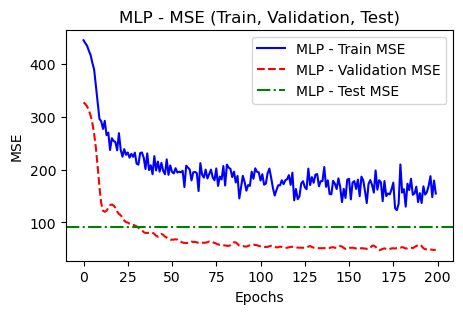

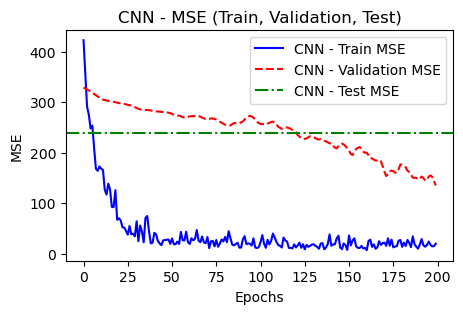

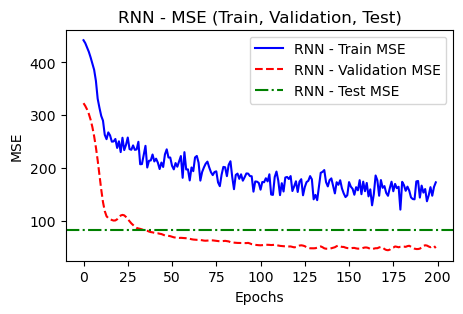

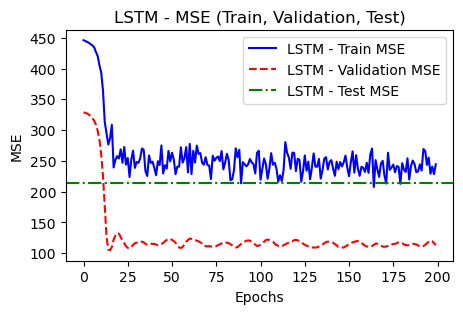

In [24]:
import matplotlib.pyplot as plt
def plot_mse_train_val_test(history, test_mse, model_name):
    plt.figure(figsize=(5, 3))
    # MSE cho train, validation và test
    plt.plot(history.history['loss'], label=f'{model_name} - Train MSE', color='blue')
    plt.plot(history.history['val_loss'], label=f'{model_name} - Validation MSE', color='red', linestyle='--')
    plt.axhline(test_mse, label=f'{model_name} - Test MSE', color='green', linestyle='-.')  # Test MSE
    plt.title(f'{model_name} - MSE (Train, Validation, Test)')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

# Vẽ MSE cho từng mô hình (MLP, CNN, RNN, LSTM)
plot_mse_train_val_test(mlp_history, mlp_mse, 'MLP')
plot_mse_train_val_test(cnn_history, cnn_mse, 'CNN')
plot_mse_train_val_test(rnn_history, rnn_mse, 'RNN')
plot_mse_train_val_test(lstm_history, lstm_mse, 'LSTM')


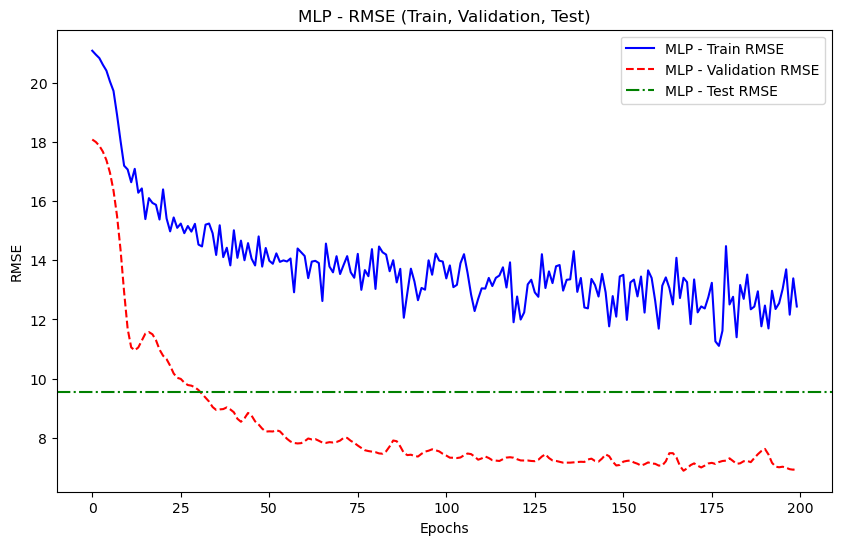

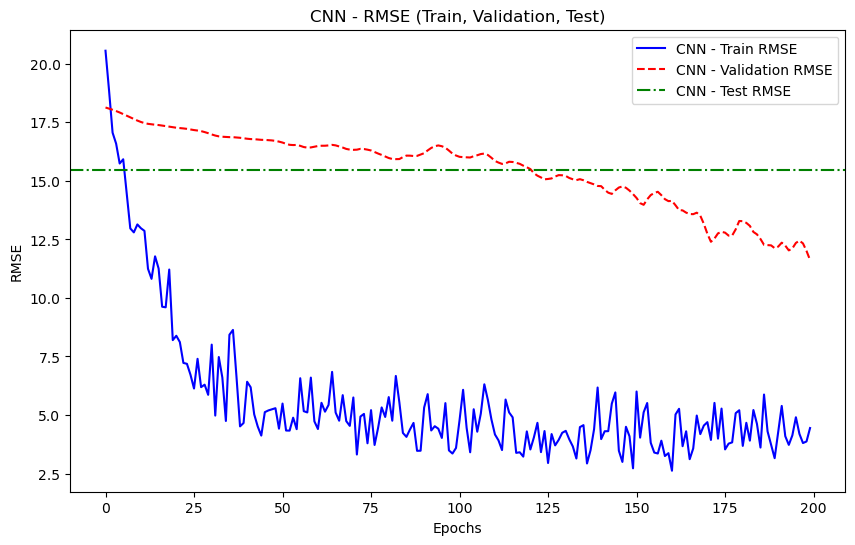

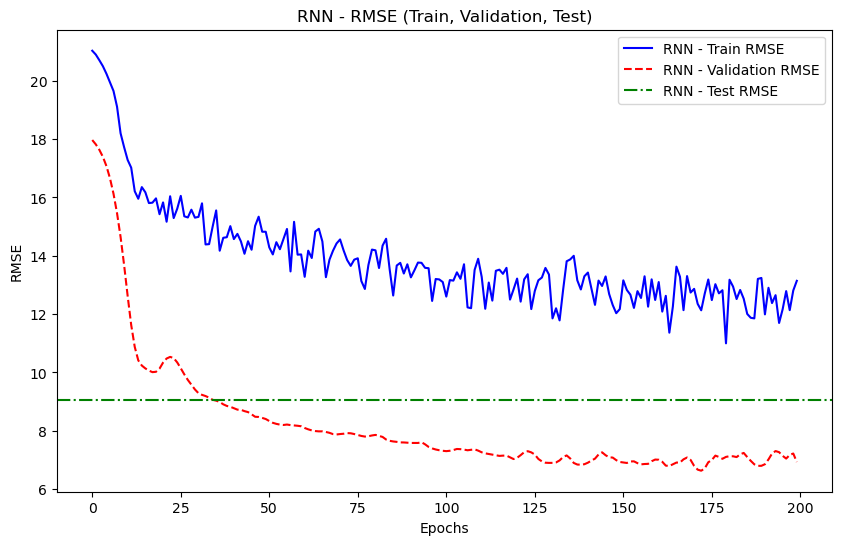

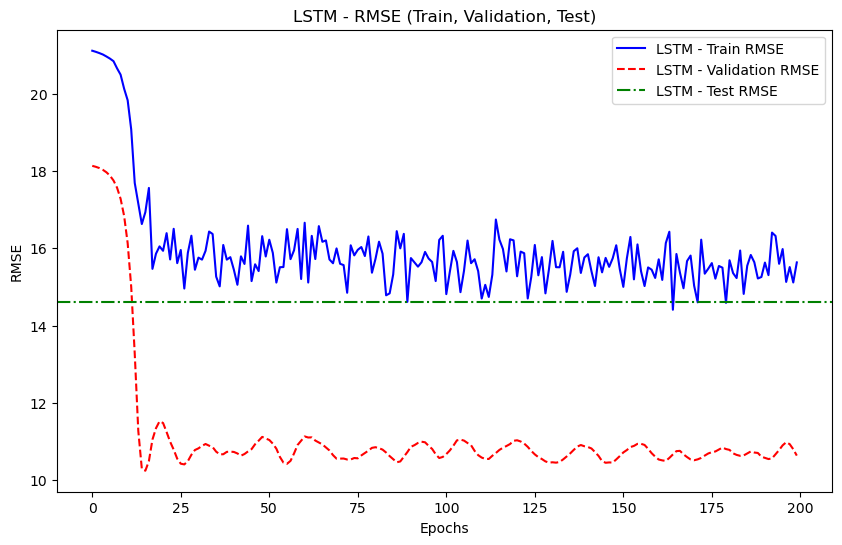

In [25]:
# Vẽ RMSE cho Train, Validation, và Test
def plot_rmse_train_val_test(history, test_rmse, model_name):
    plt.figure(figsize=(10, 6))
    plt.plot(np.sqrt(np.array(history.history['loss'])), label=f'{model_name} - Train RMSE', color='blue')
    plt.plot(np.sqrt(np.array(history.history['val_loss'])), label=f'{model_name} - Validation RMSE', color='red', linestyle='--')
    plt.axhline(test_rmse, label=f'{model_name} - Test RMSE', color='green', linestyle='-.')  # Test RMSE
    plt.title(f'{model_name} - RMSE (Train, Validation, Test)')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

plot_rmse_train_val_test(mlp_history, np.sqrt(mlp_mse), 'MLP')
plot_rmse_train_val_test(cnn_history, np.sqrt(cnn_mse), 'CNN')
plot_rmse_train_val_test(rnn_history, np.sqrt(rnn_mse), 'RNN')
plot_rmse_train_val_test(lstm_history, np.sqrt(lstm_mse), 'LSTM')


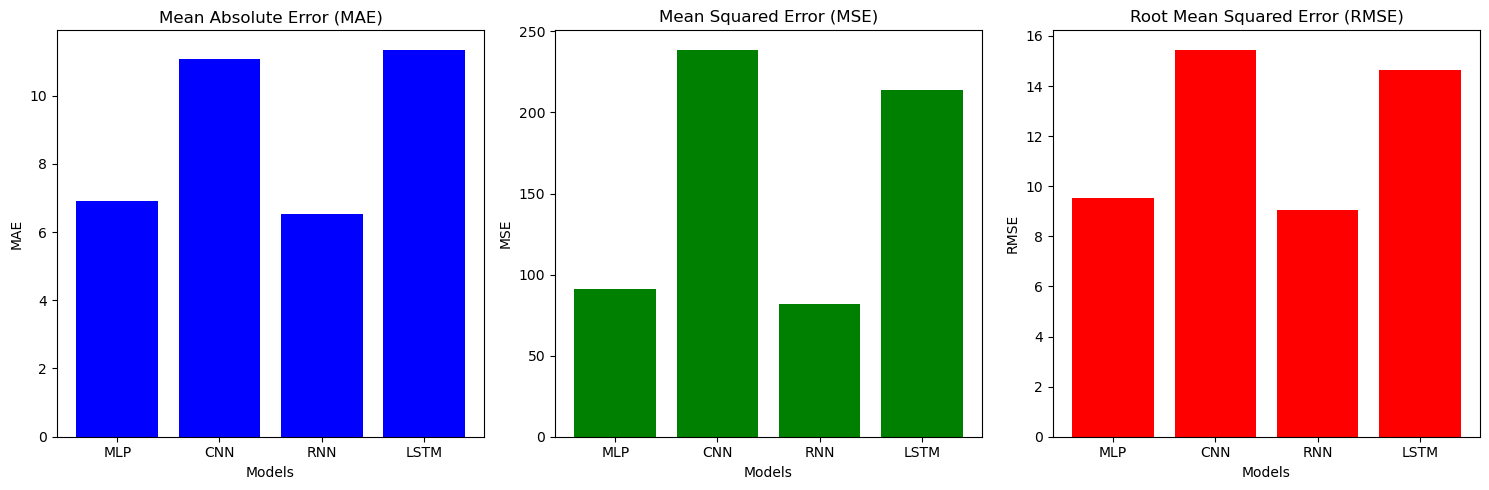

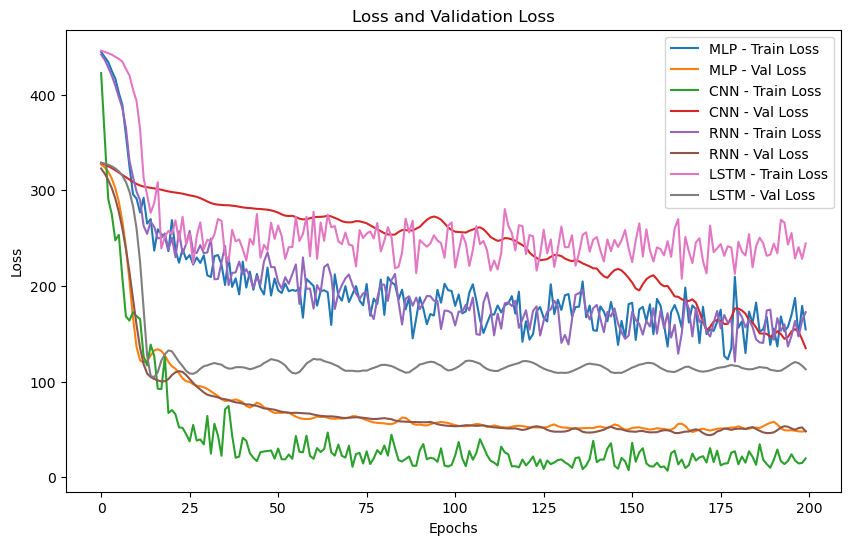

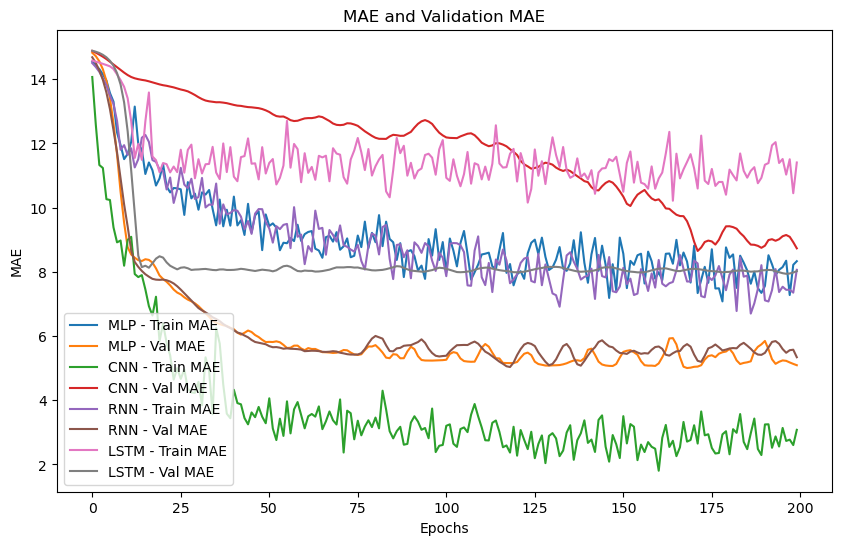

In [26]:
import matplotlib.pyplot as plt

# Dữ liệu MAE, MSE, RMSE từ các mô hình
models = ['MLP', 'CNN', 'RNN', 'LSTM']
mae_values = [mlp_mae, cnn_mae, rnn_mae, lstm_mae]
mse_values = [mlp_mse, cnn_mse, rnn_mse, lstm_mse]
rmse_values = [mlp_rmse, cnn_rmse, rnn_rmse, lstm_rmse]

# So sánh MAE, MSE, RMSE giữa các mô hình
plt.figure(figsize=(15, 5))

# Biểu đồ MAE
plt.subplot(1, 3, 1)
plt.bar(models, mae_values, color='blue')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Models')
plt.ylabel('MAE')

# Biểu đồ MSE
plt.subplot(1, 3, 2)
plt.bar(models, mse_values, color='green')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Models')
plt.ylabel('MSE')

# Biểu đồ RMSE
plt.subplot(1, 3, 3)
plt.bar(models, rmse_values, color='red')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Models')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

# Vẽ đồ thị loss và val_loss cho từng mô hình
def plot_loss(history, model_name):
    plt.plot(history.history['loss'], label=f'{model_name} - Train Loss')
    plt.plot(history.history['val_loss'], label=f'{model_name} - Val Loss')

plt.figure(figsize=(10, 6))
plot_loss(mlp_history, 'MLP')
plot_loss(cnn_history, 'CNN')
plot_loss(rnn_history, 'RNN')
plot_loss(lstm_history, 'LSTM')

plt.title('Loss and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ đồ thị MAE cho các mô hình
def plot_mae(history, model_name):
    plt.plot(history.history['mae'], label=f'{model_name} - Train MAE')
    plt.plot(history.history['val_mae'], label=f'{model_name} - Val MAE')

plt.figure(figsize=(10, 6))
plot_mae(mlp_history, 'MLP')
plot_mae(cnn_history, 'CNN')
plot_mae(rnn_history, 'RNN')
plot_mae(lstm_history, 'LSTM')

plt.title('MAE and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()



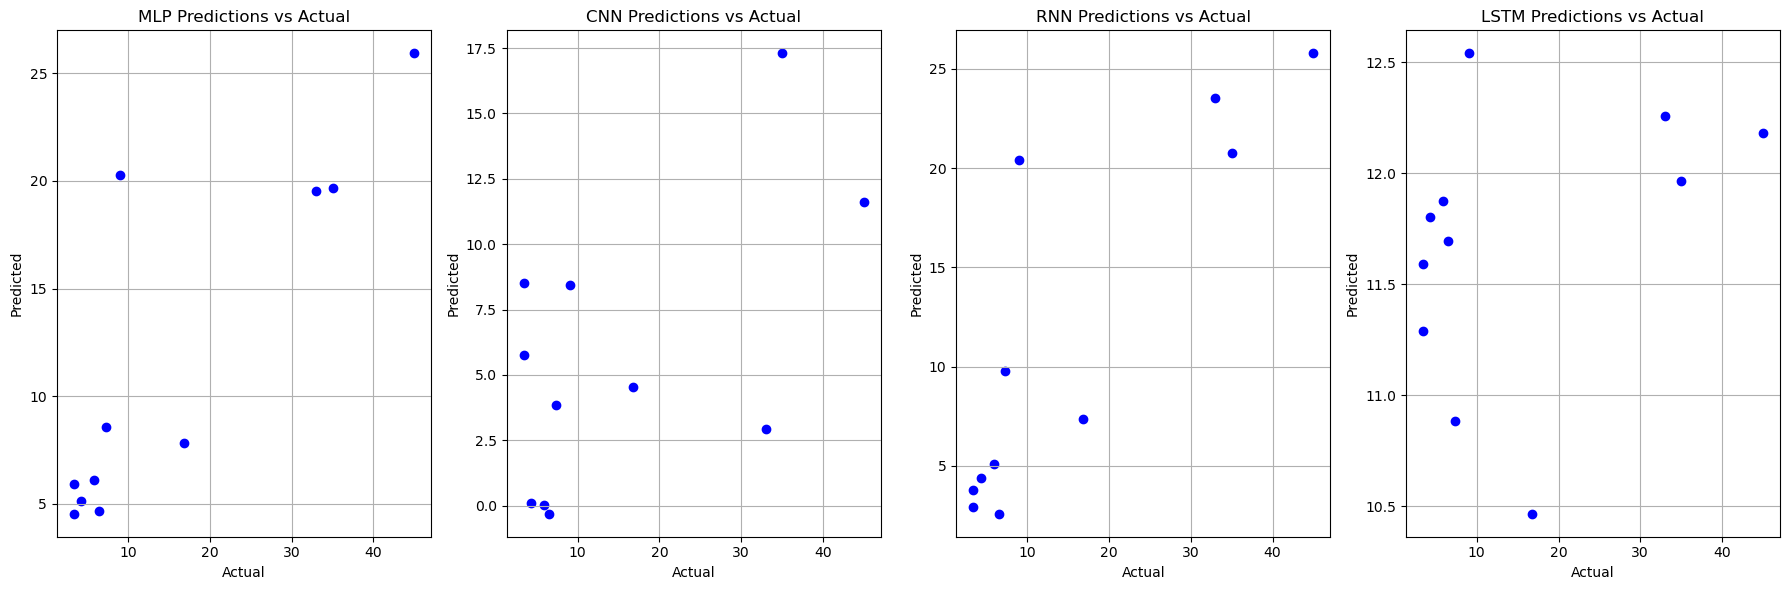

In [27]:
import matplotlib.pyplot as plt

# Dữ liệu thực tế
actual_values = y_test 

# Vẽ biểu đồ phân tán cho các mô hình
plt.figure(figsize=(18, 6))

# MLP - Vẽ ở cột 1
plt.subplot(1, 4, 1)
plt.scatter(actual_values, predicted_mlp, color='blue')
plt.title('MLP Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

# CNN - Vẽ ở cột 2
plt.subplot(1, 4, 2)
plt.scatter(actual_values, predicted_cnn, color='blue')
plt.title('CNN Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

# RNN - Vẽ ở cột 3
plt.subplot(1, 4, 3)
plt.scatter(actual_values, predicted_rnn, color='blue')
plt.title('RNN Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

# LSTM - Vẽ ở cột 4
plt.subplot(1, 4, 4)
plt.scatter(actual_values, predicted_lstm, color='blue')
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [28]:
lstm_model.save('nhadat.keras')

In [ ]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from fastapi.middleware.cors import CORSMiddleware
import tensorflow as tf
import numpy as np

# Tạo ứng dụng FastAPI
app = FastAPI()

# Cấu hình CORS
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],  # Cho phép tất cả nguồn, bạn có thể giới hạn để tăng bảo mật
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

# Tải mô hình
mon1_model = tf.keras.models.load_model('mon1_rnn.keras')
mon2_model = tf.keras.models.load_model('mon2_rnn.keras')
model= tf.keras.models.load_model("nhadat.keras")

# Hàm hỗ trợ
def check(x):
    if x >= 9.0: return 'A+'
    elif x >= 8.5: return 'A'
    elif x >= 8: return 'B+'
    elif x >= 7: return 'B'
    elif x >= 6.5: return 'C+'
    elif x >= 6: return 'C'
    elif x >= 5: return 'D+'
    elif x >= 4: return 'D'
    else: return 'F'

def tb1(a, b, c, d, x):
    if x == 1:
        return (a * 10 + b * 10 + c * 20 + d * 60) / 100
    else:
        return (a * 10 + b * 20 + c * 20 + d * 50) / 100
    
class HouseFeatures(BaseModel):
    areaM2: float
    bedroom: int
    direction: int
    frontage: float
    lat: float
    legal: int
    long: float
    toiletCount: int

# Khai báo kiểu dữ liệu đầu vào
class InputData(BaseModel):
    input: list[float]

# API dự đoán với mô hình RNN
@app.post('/mon1')
async def predict_rnn(data: InputData):
    try:
        input_data = data.input
        a = input_data
        if len(input_data) != 3:
            raise HTTPException(status_code=400, detail="Dữ liệu đầu vào phải có 3 điểm")

        input_data = np.array(input_data).reshape(1, 1, 3)
        prediction = mon1_model.predict(input_data)
        ck = round(float(prediction[0][0]), 1)  # Chuyển đổi sang float
        tb = tb1(a[0], a[1], a[2], ck, 1)

        return {'prediction': ck, 'diem': tb, 'diemChu': check(tb)}

    except Exception as e:
        raise HTTPException(status_code=400, detail=str(e))

# API dự đoán với mô hình LSTM
@app.post('/mon2')
async def predict_lstm(data: InputData):
    try:
        input_data = data.input
        a = input_data
        if len(input_data) != 3:
            raise HTTPException(status_code=400, detail="Dữ liệu đầu vào phải có 3 điểm")

        input_data = np.array(input_data).reshape(1, 1, 3)
        prediction = mon2_model.predict(input_data)
        ck = round(float(prediction[0][0]), 1)  # Chuyển đổi sang float
        tb = tb1(a[0], a[1], a[2], ck, 2)

        return {'prediction': ck, 'diem': tb, 'diemChu': check(tb)}

    except Exception as e:
        raise HTTPException(status_code=400, detail=str(e))

@app.post("/predict")
def predict_price(features: HouseFeatures):
    # Chuyển dữ liệu đầu vào thành định dạng numpy array
    input_data = np.array([[features.areaM2, features.bedroom, features.direction,
                            features.frontage, features.lat, features.legal,
                            features.long, features.toiletCount]])
    
    input_data = input_data.reshape((input_data.shape[1],1,1))
    prediction = model.predict(input_data)
    
    # Trả về kết quả dự đoán
    return {"predicted_price": float(prediction[0][0])}

# API kiểm tra kết nối
@app.get('/')
async def root():
    return {"message": "Xin chao"}
